https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_cars = pd.read_csv('auto-mpg.csv')
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [16]:
# Correcting the brand name (Since misspelled, we have to correct it)
df_cars['car name'] = df_cars['car name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['car name'] = df_cars['car name'].str.replace('maxda|mazda','mazda')
df_cars['car name'] = df_cars['car name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['car name'] = df_cars['car name'].str.replace('toyota|toyouta','toyota')
df_cars['car name'] = df_cars['car name'].str.replace('vokswagen|volkswagen|vw','volkswagen')

/tmp/ipykernel_14246/803907318.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['car name'] = df_cars['car name'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
/tmp/ipykernel_14246/803907318.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['car name'] = df_cars['car name'].str.replace('maxda|mazda','mazda')
/tmp/ipykernel_14246/803907318.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['car name'] = df_cars['car name'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
/tmp/ipykernel_14246/803907318.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cars['car name'] = df_cars['car name'].str.replace('toyota|toyouta','toyota')
/tmp/ipykernel_14246/803907318.py:6: FutureWarning: The default value of regex will change from True to False 

In [22]:
df_cars.groupby(['car name']).sum().head(20)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
car name,,,,,,,
amc ambassador brougham,13.0,8,360.0,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,3672,11.5,72,1
amc concord,43.7,10,383.0,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,3410,15.1,78,1
amc concord dl,23.0,4,151.0,3035,20.5,82,1
amc concord dl 6,20.2,6,232.0,3265,18.2,79,1
amc gremlin,78.0,24,895.0,10985,59.0,289,4
amc hornet,77.5,24,895.0,11705,65.1,293,4


In [42]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


In [25]:
# Handling missing values
df_cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


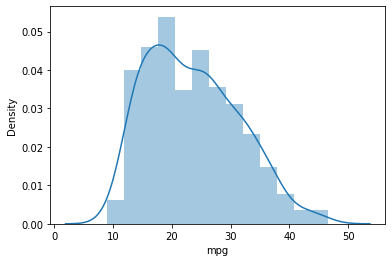

In [52]:
# Visualising the data
sns.distplot(df_cars['mpg'],hist= True )
plt.show()

In skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

In [53]:
## Finding skew and kurtosis
print("Skewness: %f" %df_cars['mpg'].skew()) ## Positive value of skew of mpg column can be verified from the histogram above as well
print("Kurtosis: %f" %df_cars['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [60]:
# Converting categorical columns to numerical 
df_cars=  pd.get_dummies(df_cars, columns=['car name'])

In [ ]:
# Droping the converted column
df_cars = df_cars.drop('car name',axis=1)

<AxesSubplot:xlabel='weight'>

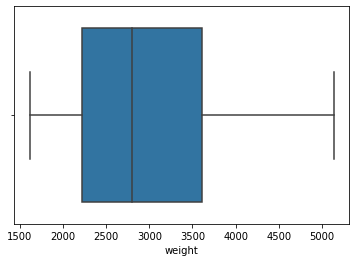

In [64]:
## Detecting Outliers
sns.boxplot(x='weight', data=df_cars)

###### Univariate Analysis

/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


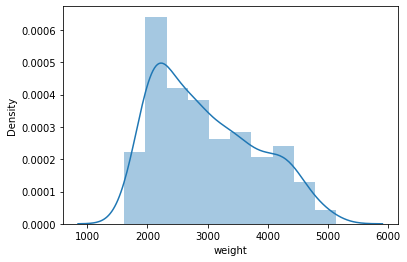

In [66]:
sns_plot = sns.distplot(df_cars["weight"])

###### Bivariate Analysis

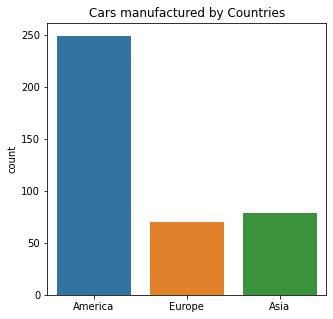

In [67]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

###### Exploring the range and distribution of numerical Variables

/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

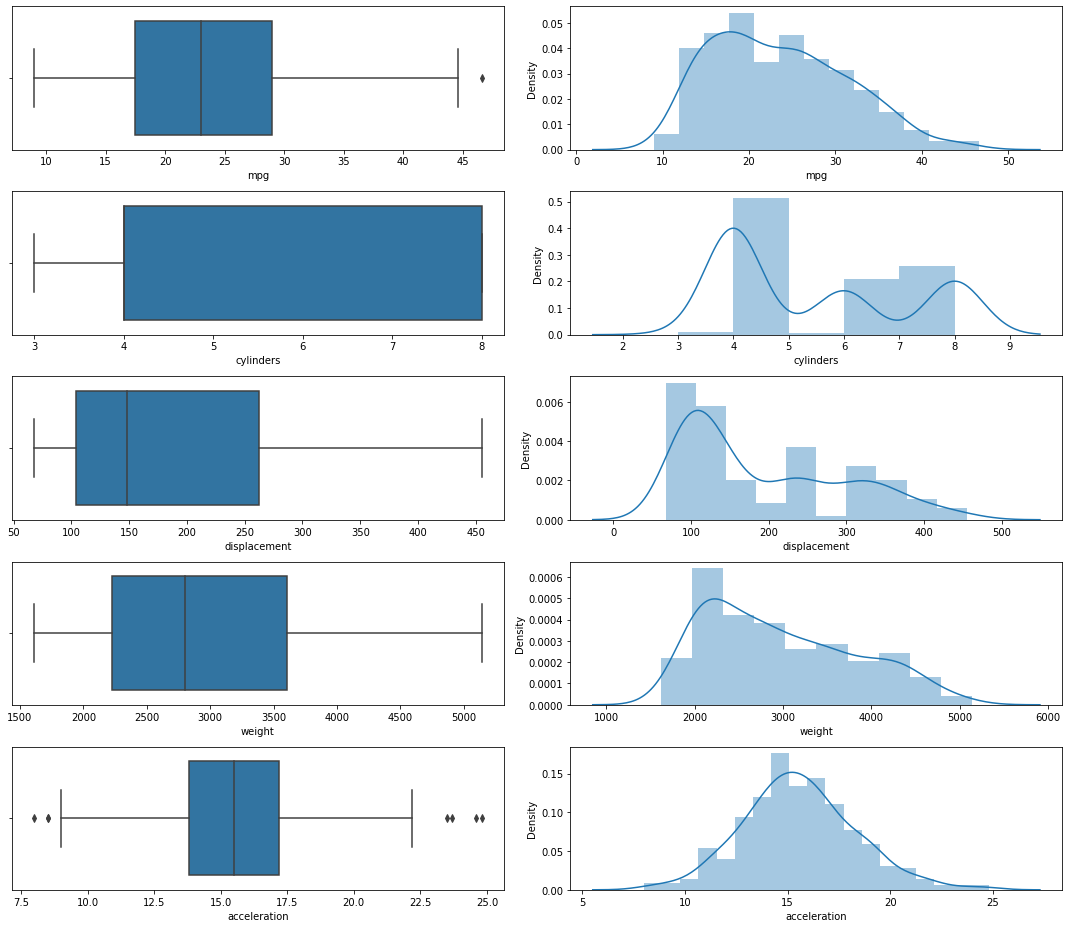

In [69]:
fig, ax = plt.subplots(5, 2, figsize = (15, 13))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
sns.distplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
sns.distplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
sns.distplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["weight"], ax = ax[3,0])
sns.distplot(df_cars['weight'], ax = ax[3,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[4,0])
sns.distplot(df_cars['acceleration'], ax = ax[4,1])
plt.tight_layout()

##### A scatterplot is a type of data display that shows the relationship between two numerical variables. 

KeyError: 'model_year'

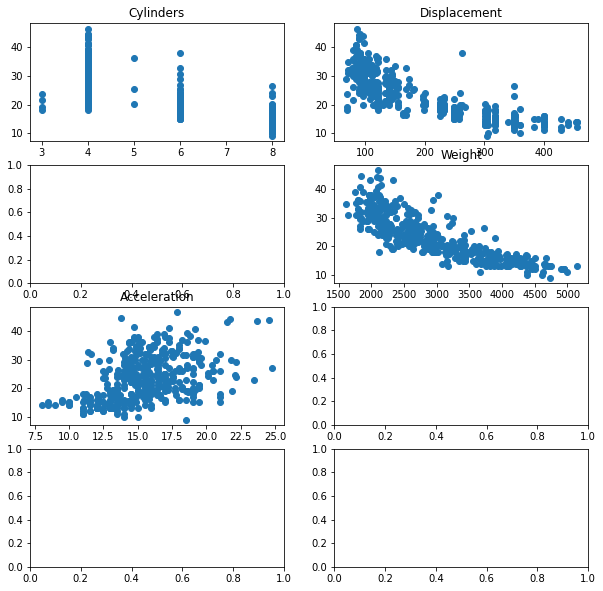

In [70]:
f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model_year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

###### Multi-Variate Analysis

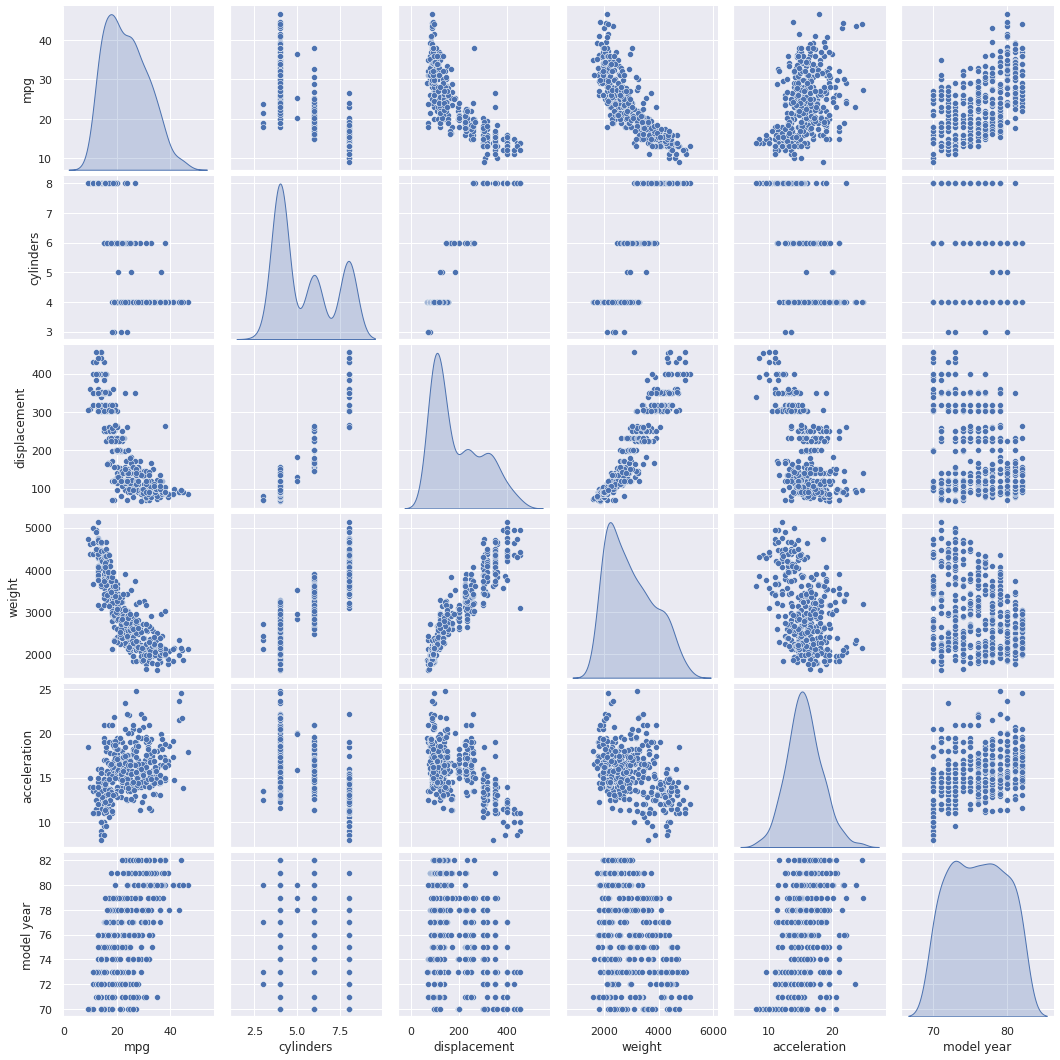

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde') 

###### Correlation – By Heatmap the relationship between the features.
    Dark color represents a positive correlation,
    Light color/ white is a towards the negative correlation.


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()